<a href="https://colab.research.google.com/github/szymonszczurowski/Housing-Market-Analysis/blob/main/housing_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing price predictor model

---



## 1.0.0 Importing Libraries and Packages

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import seaborn as sns
from math import ceil
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector, make_column_transformer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV




## 2.0.0 Data





### 2.1.0 Importing the Data Set

In [51]:
dwellings = pd.read_csv('drive/MyDrive/Housing_Project/sale_of_dwellings_2019-2023.csv')

### 2.2.0  Data structure and **description**

In [52]:
dwellings.head()

,Jednostka ewid.,Dokument,Data dokumentu,IDRCN,Opis,Forma obrotu,Rynek,Strona sprzedająca,Strona kupująca,Cena brutto,...,Numer.2,Opis.3,Funkcja lokalu,Liczba izb,Kondygnacja,Powierzchnia użytkowa,Pow.uż.p.p,Cena brutto.4,Kwota VAT.4,Adres(y).2
0,MORĄG - MIASTO,AN 25/2019,03/01/2019,7049,"umowa sprzedaży, umowa darowizny",wolny rynek,wtórny,osoba fizyczna,osoba fizyczna,100000.0,...,"57;1,32",NaN,mieszkalna,3,3,45.90,5.30,100000.0,NaN,DWORCOWA 7; MORĄG
1,MORĄG - MIASTO,AN 162/2019,14/01/2019,7072,umowa sprzedaży,wolny rynek,wtórny,osoba fizyczna,osoba fizyczna,100000.0,...,"846/1;1,6",NaN,mieszkalna,3,2,48.45,0.00,NaN,NaN,HERDERA 2; MORĄG
2,MORĄG - MIASTO,AN 140/2019,11/01/2019,7073,umowa sprzedaży,wolny rynek,wtórny,osoba fizyczna,osoba fizyczna,82500.0,...,"13;1,14",NaN,mieszkalna,2,4,38.22,0.00,NaN,NaN,KWIATOWA 10; MORĄG
3,MORĄG - MIASTO,AN 12/2019,02/01/2019,7075,umowa sprzedaży oraz oświadczenie o ustanowien...,wolny rynek,wtórny,osoba fizyczna,osoba fizyczna,180000.0,...,"94/8;1,7",NaN,mieszkalna,4,NaN,66.50,0.00,NaN,NaN,NaN
4,MORĄG - MIASTO,AN 74/2019,04/01/2019,7076,umowa ustanowienia odrębnej własności lokalu m...,wolny rynek,wtórny,osoba fizyczna,osoba fizyczna,140000.0,...,"82/3;1,5",NaN,mieszkalna,2,3,51.35,0.00,NaN,NaN,MICKIEWICZA 9C; MORĄG


In [53]:
dwellings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Jednostka ewid.             534 non-null    object 
 1   Dokument                    534 non-null    object 
 2   Data dokumentu              534 non-null    object 
 3   IDRCN                       534 non-null    int64  
 4   Opis                        532 non-null    object 
 5   Forma obrotu                534 non-null    object 
 6   Rynek                       503 non-null    object 
 7   Strona sprzedająca          534 non-null    object 
 8   Strona kupująca             534 non-null    object 
 9   Cena brutto                 534 non-null    float64
 10  Kwota VAT                   91 non-null     float64
 11  Suma pow. działek           534 non-null    int64  
 12  Nieruchomość                534 non-null    object 
 13  Opis nier.                  453 non

In [54]:
dwellings.describe()

,IDRCN,Cena brutto,Kwota VAT,Suma pow. działek,Kwota VAT.1,Kwota VAT.2,Cena brutto.3,Kwota VAT.3,Cena brutto.4,Kwota VAT.4
count,534.000000,534.000000,91.000000,534.000000,62.000000,0.0,0.0,0.0,2.000000,0.0
mean,17757.486891,171929.643090,14854.813077,3027.372659,13552.148226,NaN,NaN,NaN,105000.000000,NaN
std,7804.421361,83710.535472,6195.552669,2913.129570,6226.313729,NaN,NaN,NaN,7071.067812,NaN
min,7049.000000,2003.500000,6296.300000,117.000000,6296.300000,NaN,NaN,NaN,100000.000000,NaN
25%,7278.250000,115000.000000,11111.110000,710.000000,9240.740000,NaN,NaN,NaN,102500.000000,NaN
50%,21476.500000,162425.000000,12800.000000,1612.000000,11740.740000,NaN,NaN,NaN,105000.000000,NaN
75%,23955.750000,215000.000000,17660.850000,5164.750000,15833.337500,NaN,NaN,NaN,107500.000000,NaN
max,26768.000000,517500.000000,36296.300000,9990.000000,36296.300000,NaN,NaN,NaN,110000.000000,NaN


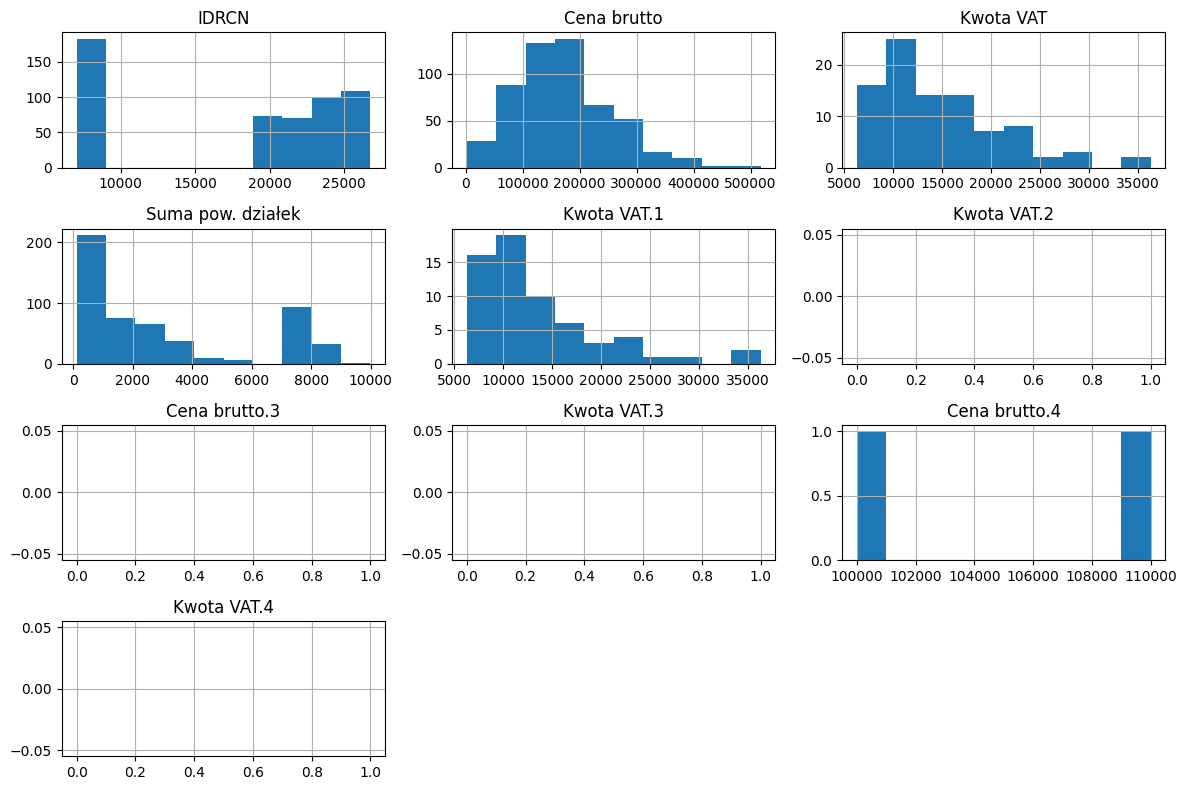

In [55]:
dwellings.hist(bins=10, figsize=(12, 8))
plt.tight_layout()
plt.show()

### 2.3.0 Data pre-cleaning

#### 2.3.1 Removal of Insignificant Features

In [56]:
dwellings = dwellings.drop(columns=['Jednostka ewid.',
                                    'Dokument',
                                    'IDRCN',
                                    'Opis',
                                    'Strona sprzedająca',
                                    'Strona kupująca',
                                    'Kwota VAT',
                                    'Suma pow. działek',
                                    'Opis nier.',
                                    'Rodzaj prawa',
                                    'Udział',
                                    'Pole powierzchni gruntowej',
                                    'Cena brutto.1',
                                    'Kwota VAT.1',
                                    'Obręb',
                                    'Numer',
                                    'Powierzchnia',
                                    'Opis.1',
                                    'MPZP',
                                    'Sposób użytkowania',
                                    'Cena brutto.2',
                                    'Kwota VAT.2',
                                    'Adres(y)',
                                    'Obręb.1',
                                    'Numer.1',
                                    'Opis.2',
                                    'Pow. użytkowa',
                                    'Cena brutto.3',
                                    'Kwota VAT.3',
                                    'Adres(y).1',
                                    'Obręb.2',
                                    'Numer.2',
                                    'Opis.3',
                                    'Funkcja lokalu',
                                    'Cena brutto.4',
                                    'Kwota VAT.4',
                                    'Adres(y).2'
                                    ])

In [57]:
dwellings.head()

,Data dokumentu,Forma obrotu,Rynek,Cena brutto,Nieruchomość,Rodzaj budynku,Liczba izb,Kondygnacja,Powierzchnia użytkowa,Pow.uż.p.p
0,03/01/2019,wolny rynek,wtórny,100000.0,lokalowa,biurowy,3,3,45.90,5.30
1,14/01/2019,wolny rynek,wtórny,100000.0,lokalowa,mieszkalny,3,2,48.45,0.00
2,11/01/2019,wolny rynek,wtórny,82500.0,lokalowa,mieszkalny,2,4,38.22,0.00
3,02/01/2019,wolny rynek,wtórny,180000.0,lokalowa,mieszkalny,4,NaN,66.50,0.00
4,04/01/2019,wolny rynek,wtórny,140000.0,lokalowa,mieszkalny,2,3,51.35,0.00


In [58]:
dwellings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Data dokumentu         534 non-null    object 
 1   Forma obrotu           534 non-null    object 
 2   Rynek                  503 non-null    object 
 3   Cena brutto            534 non-null    float64
 4   Nieruchomość           534 non-null    object 
 5   Rodzaj budynku         493 non-null    object 
 6   Liczba izb             531 non-null    object 
 7   Kondygnacja            440 non-null    object 
 8   Powierzchnia użytkowa  534 non-null    object 
 9   Pow.uż.p.p             534 non-null    object 
dtypes: float64(1), object(9)
memory usage: 41.8+ KB


In [59]:
dwellings.dtypes.value_counts()

object     9
float64    1
dtype: int64

In [60]:
dwellings['Forma obrotu'].value_counts()

wolny rynek                             508
sprzedaż z bonifikatą                    16
sprzedaż w postepowaniu egzekucyjnym      9
sprzedaż bezprzetargowa                   1
Name: Forma obrotu, dtype: int64

In [61]:
dwellings['Rynek'].value_counts()

wtórny       380
pierwotny    123
Name: Rynek, dtype: int64

In [62]:
dwellings['Nieruchomość'].value_counts()

lokalowa                                   517
lokalowa\ngruntowa niezabudowana             9
lokalowa\nlokalowa                           3
gruntowa zabudowana\nlokalowa                3
gruntowa niezabudowana                       1
gruntowa zabudowana\nlokalowa\nlokalowa      1
Name: Nieruchomość, dtype: int64

In [63]:
dwellings['Rodzaj budynku'].value_counts()

mieszkalny                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [64]:
dwellings['Kondygnacja'].value_counts()

1             111
3             108
2             105
4              76
5              34
1\n1            2
2\n             1
1\n2\n2\n1      1
1\n             1
3\n             1
Name: Kondygnacja, dtype: int64

In [65]:
dwellings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Data dokumentu         534 non-null    object 
 1   Forma obrotu           534 non-null    object 
 2   Rynek                  503 non-null    object 
 3   Cena brutto            534 non-null    float64
 4   Nieruchomość           534 non-null    object 
 5   Rodzaj budynku         493 non-null    object 
 6   Liczba izb             531 non-null    object 
 7   Kondygnacja            440 non-null    object 
 8   Powierzchnia użytkowa  534 non-null    object 
 9   Pow.uż.p.p             534 non-null    object 
dtypes: float64(1), object(9)
memory usage: 41.8+ KB


#### 2.3.2 Elimination of Insignificant Rows


In [66]:
kondygnacje = ['1', '2', '3', '4', '5']

dwellings = dwellings.loc[
    (dwellings['Forma obrotu'] == 'wolny rynek') &
    (dwellings['Nieruchomość'] == 'lokalowa') &
    (dwellings['Rodzaj budynku'] == 'mieszkalny') &
    (dwellings['Kondygnacja'].isin(kondygnacje))
]


#### 2.3.3 Replacement/Removal of Null values




In [67]:
dwellings.isnull().any()

Data dokumentu           False
Forma obrotu             False
Rynek                     True
Cena brutto              False
Nieruchomość             False
Rodzaj budynku           False
Liczba izb               False
Kondygnacja              False
Powierzchnia użytkowa    False
Pow.uż.p.p               False
dtype: bool

In [68]:
dwellings.isnull().sum()

Data dokumentu            0
Forma obrotu              0
Rynek                    13
Cena brutto               0
Nieruchomość              0
Rodzaj budynku            0
Liczba izb                0
Kondygnacja               0
Powierzchnia użytkowa     0
Pow.uż.p.p                0
dtype: int64

In [69]:
dwellings[dwellings.isnull().any(axis=1)]


,Data dokumentu,Forma obrotu,Rynek,Cena brutto,Nieruchomość,Rodzaj budynku,Liczba izb,Kondygnacja,Powierzchnia użytkowa,Pow.uż.p.p
430,01/12/2022,wolny rynek,NaN,275000.0,lokalowa,mieszkalny,4,2,65.05,0.00
435,09/08/2022,wolny rynek,NaN,340000.0,lokalowa,mieszkalny,4,2,60.30,6.10
491,25/04/2023,wolny rynek,NaN,370000.0,lokalowa,mieszkalny,4,3,92.80,0.00
494,26/04/2023,wolny rynek,NaN,300000.0,lokalowa,mieszkalny,4,4,65.00,6.40
501,03/07/2023,wolny rynek,NaN,200000.0,lokalowa,mieszkalny,4,3,57.21,0.00
502,06/07/2023,wolny rynek,NaN,150000.0,lokalowa,mieszkalny,2,2,35.50,0.00
503,21/07/2023,wolny rynek,NaN,190000.0,lokalowa,mieszkalny,3,3,51.50,3.40
505,25/07/2023,wolny rynek,NaN,100000.0,lokalowa,mieszkalny,3,3,37.84,0.00
511,25/08/2023,wolny rynek,NaN,115000.0,lokalowa,mieszkalny,2,3,47.61,0.00
517,13/09/2023,wolny rynek,NaN,365000.0,lokalowa,mieszkalny,2,3,60.60,11.30


In [70]:
Q1 = dwellings['Cena brutto'].quantile(0.25)
Q3 = dwellings['Cena brutto'].quantile(0.75)

def determine_market(cena):
    if cena < Q1:
        return 'pierwotny'
    else:
        return 'wtórny'


dwellings.loc[:, 'Rynek'] = dwellings['Cena brutto'].apply(determine_market)

In [71]:
dwellings.isnull().any()

Data dokumentu           False
Forma obrotu             False
Rynek                    False
Cena brutto              False
Nieruchomość             False
Rodzaj budynku           False
Liczba izb               False
Kondygnacja              False
Powierzchnia użytkowa    False
Pow.uż.p.p               False
dtype: bool

#### 2.3.4 Leaving key features

In [72]:
dwellings = dwellings.drop(columns=['Forma obrotu', 'Nieruchomość', 'Rodzaj budynku'])

In [73]:
dwellings = dwellings.reset_index(drop=True)

#### 2.3.5 Renaming columns

In [74]:
dwellings.rename(columns={
    'Data dokumentu': 'Date',
    'Rynek': 'Market',
    'Cena brutto': 'Gross_Price',
    'Liczba izb': 'Number_of_Rooms',
    'Kondygnacja': 'Floor',
    'Powierzchnia użytkowa': 'Usable_Area',
    'Pow.uż.p.p': 'Usable_area_of_a_p'
}, inplace=True)

#### 2.3.6 Setting Of Data Types

In [75]:
dwellings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                245 non-null    object 
 1   Market              245 non-null    object 
 2   Gross_Price         245 non-null    float64
 3   Number_of_Rooms     245 non-null    object 
 4   Floor               245 non-null    object 
 5   Usable_Area         245 non-null    object 
 6   Usable_area_of_a_p  245 non-null    object 
dtypes: float64(1), object(6)
memory usage: 13.5+ KB


In [76]:
dwellings['Date'] = pd.to_datetime(dwellings['Date'], format='%d/%m/%Y')
dwellings['Market'] = dwellings['Market'].astype('category')
dwellings['Gross_Price'] = dwellings['Gross_Price'].astype('float64')
dwellings['Number_of_Rooms'] = dwellings['Number_of_Rooms'].astype('category')
dwellings['Floor'] = dwellings['Floor'].astype('category')
dwellings['Usable_Area'] = dwellings['Usable_Area'].astype('float64')
dwellings['Usable_area_of_a_p'] = dwellings['Usable_area_of_a_p'].astype('float64')

In [77]:
dwellings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                245 non-null    datetime64[ns]
 1   Market              245 non-null    category      
 2   Gross_Price         245 non-null    float64       
 3   Number_of_Rooms     245 non-null    category      
 4   Floor               245 non-null    category      
 5   Usable_Area         245 non-null    float64       
 6   Usable_area_of_a_p  245 non-null    float64       
dtypes: category(3), datetime64[ns](1), float64(3)
memory usage: 9.0 KB


### 2.5.0 Exploratory Data Analysis (EDA)

In [78]:
dwellings_EDA = dwellings.copy()

#### 2.5.1 Data preview

In [79]:
dwellings.head()

,Date,Market,Gross_Price,Number_of_Rooms,Floor,Usable_Area,Usable_area_of_a_p
0,2019-01-14,pierwotny,100000.0,3,2,48.45,0.00
1,2019-01-11,pierwotny,82500.0,2,4,38.22,0.00
2,2019-01-04,wtórny,140000.0,2,3,51.35,0.00
3,2019-02-01,wtórny,240000.0,3,2,61.00,2.97
4,2019-02-14,pierwotny,100000.0,3,1,37.60,2.50


#### 2.5.2 About DataFrame

In [80]:
dwellings_EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                245 non-null    datetime64[ns]
 1   Market              245 non-null    category      
 2   Gross_Price         245 non-null    float64       
 3   Number_of_Rooms     245 non-null    category      
 4   Floor               245 non-null    category      
 5   Usable_Area         245 non-null    float64       
 6   Usable_area_of_a_p  245 non-null    float64       
dtypes: category(3), datetime64[ns](1), float64(3)
memory usage: 9.0 KB


#### 2.5.3 Descriptive statistics

In [81]:
dwellings.describe()

,Gross_Price,Usable_Area,Usable_area_of_a_p
count,245.000000,245.000000,245.000000
mean,183722.375510,49.180490,3.194857
std,78994.901372,14.708841,4.910412
min,50000.000000,27.650000,0.000000
25%,130000.000000,37.800000,0.000000
50%,170000.000000,47.000000,1.400000
75%,227000.000000,57.300000,4.640000
max,490000.000000,117.000000,37.000000


#### 2.5.4 Histograms

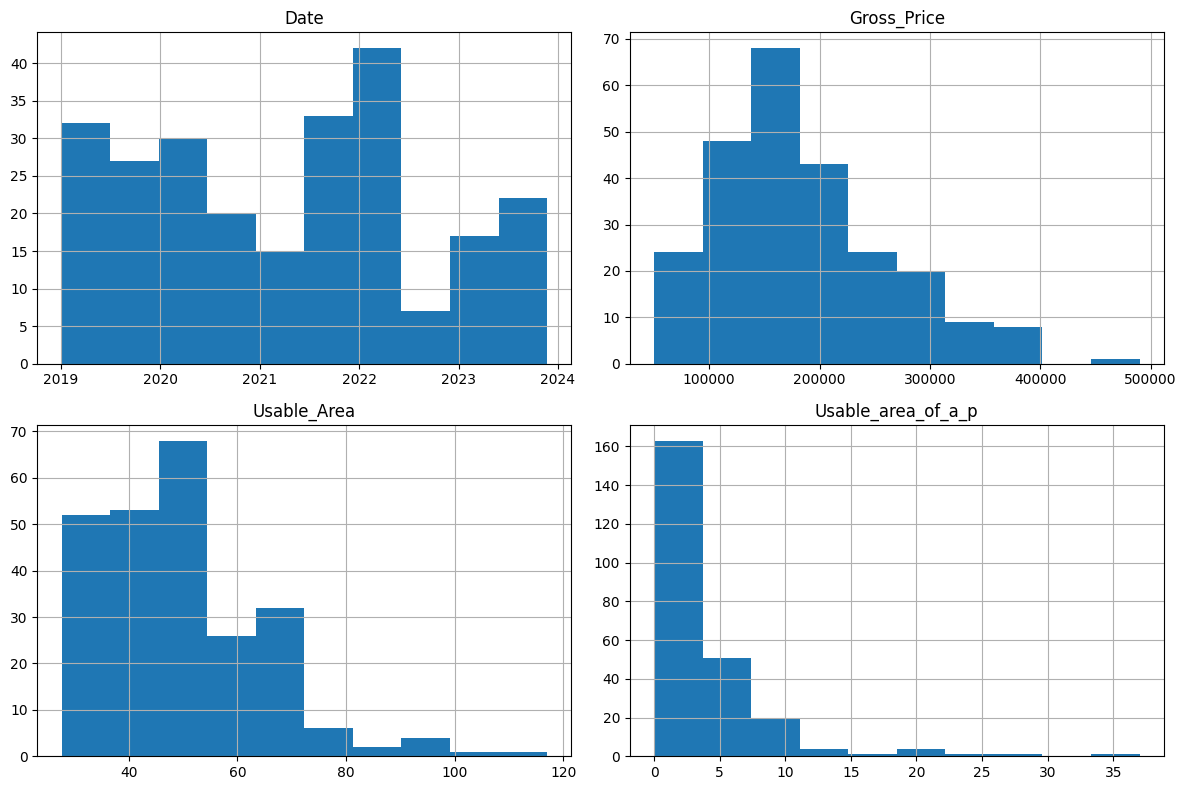

In [82]:
dwellings_EDA.hist(bins=10, figsize=(12, 8))
plt.tight_layout()
plt.show()

#### 2.5.5 Par charts

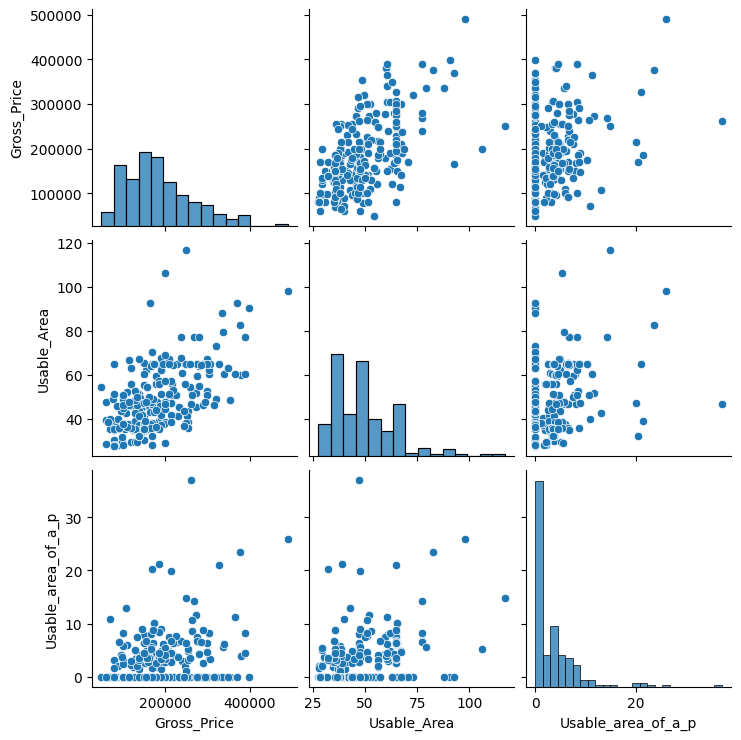

In [83]:
sns.pairplot(dwellings_EDA.select_dtypes(include=['float64']))
plt.show()

#### 2.5.6 Box charts

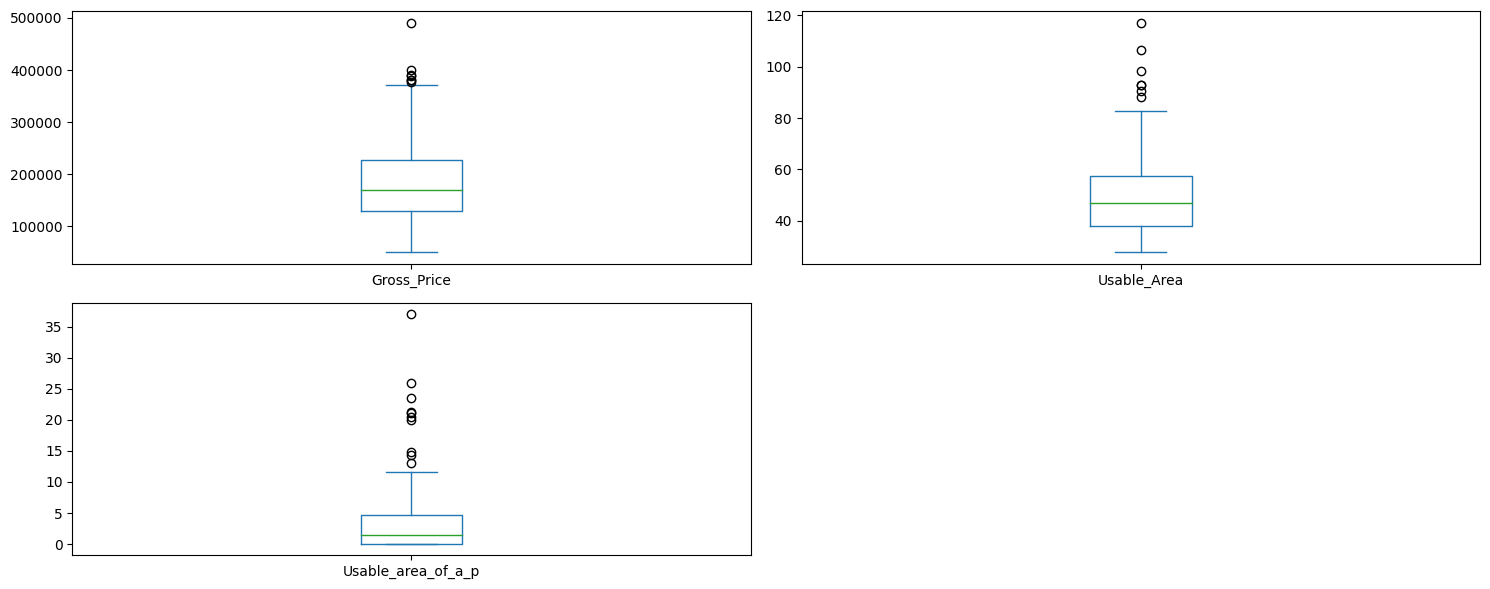

In [84]:
num_columns = dwellings_EDA.select_dtypes(include=['float64']).columns
dwellings_EDA[num_columns].plot(kind='box', subplots=True, layout=(2, ceil(len(num_columns)/2)), figsize=(15, 6))
plt.tight_layout()
plt.show()

In [85]:
for col in num_columns:
    Q1 = dwellings_EDA[col].quantile(0.25)
    Q3 = dwellings_EDA[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((dwellings_EDA[col] < (Q1 - 1.5 * IQR)) | (dwellings_EDA[col] > (Q3 + 1.5 * IQR)))
    print(f"{col} - Outliers: {outliers.sum()}")

Gross_Price - Outliers: 7
Usable_Area - Outliers: 7
Usable_area_of_a_p - Outliers: 10


#### 2.5.7 Bar Charts for Categorical Variables

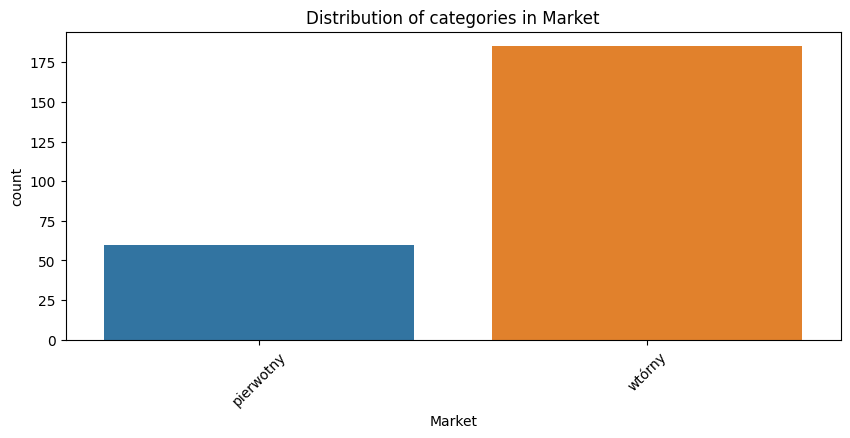

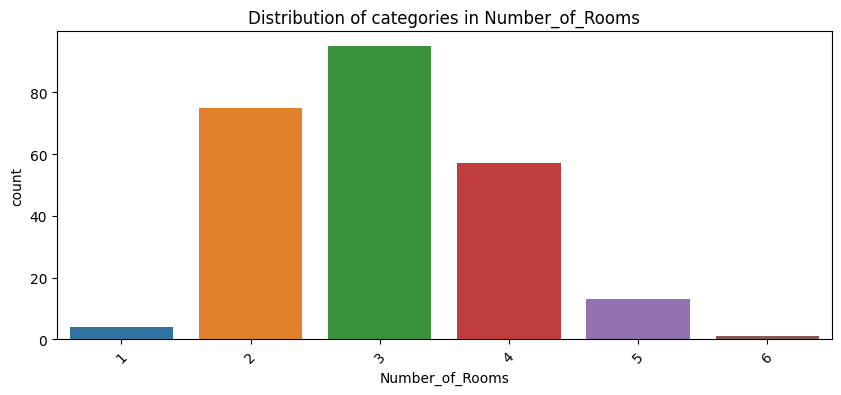

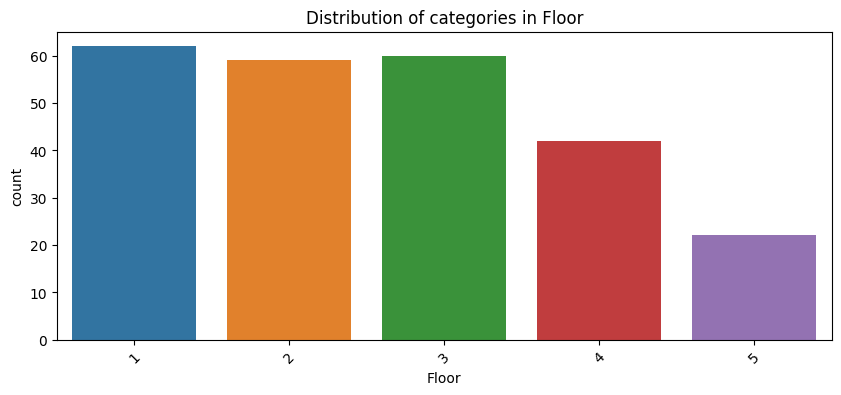

In [86]:
cat_columns = dwellings_EDA.select_dtypes(include=['category']).columns
for col in cat_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=dwellings_EDA)
    plt.title(f'Distribution of categories in {col}')
    plt.xticks(rotation=45)
    plt.show()

#### 2.5.8 Correlations

In [87]:
corr_matrix = dwellings_EDA.corr(numeric_only = True)
corr_matrix['Gross_Price'].sort_values(ascending=False)

Gross_Price           1.000000
Usable_Area           0.584368
Usable_area_of_a_p    0.352625
Name: Gross_Price, dtype: float64

#### 2.5.9 Scatterplot matrix

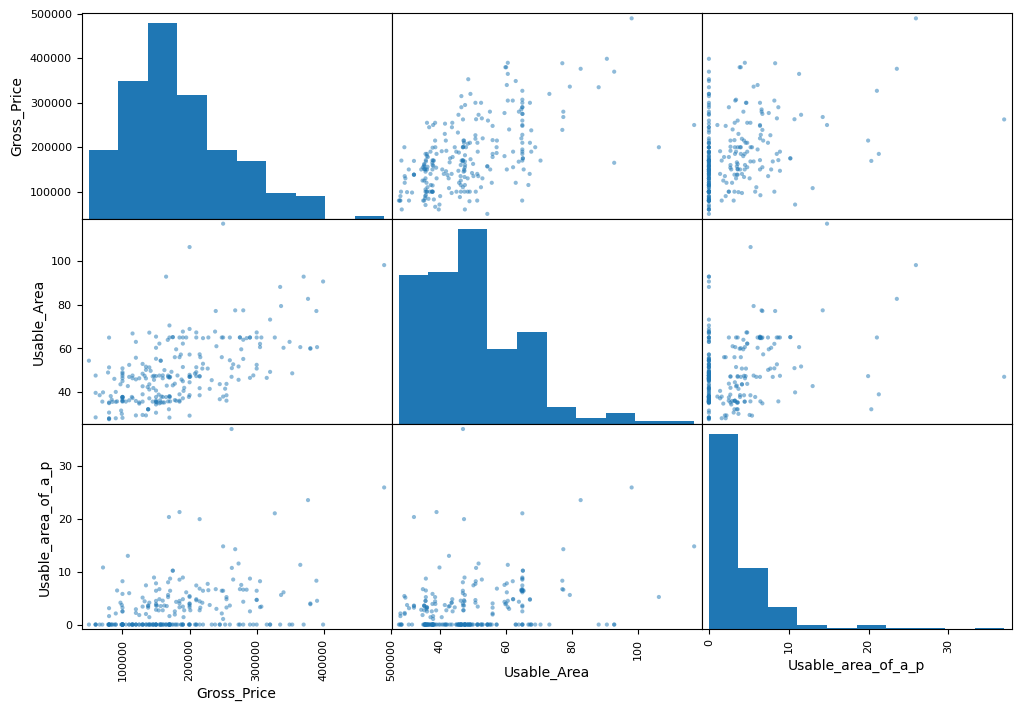

In [88]:
attributes = dwellings_EDA.select_dtypes(include=['float64']).columns

scatter_matrix(dwellings_EDA[attributes], figsize=(12, 8))
plt.show()


#### 2.5.10 Heatmap of correlations

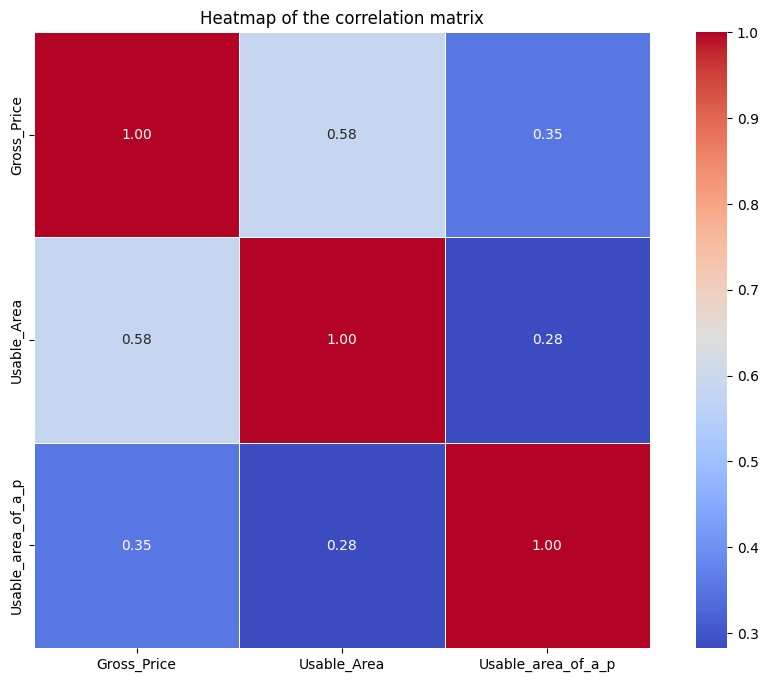

In [89]:


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar=True, square=True, linewidths=.5)

plt.title('Heatmap of the correlation matrix')
plt.show()


In [90]:
dwellings_EDA['Year'] = dwellings_EDA['Date'].dt.year
dwellings_EDA['Month'] = dwellings_EDA['Date'].dt.month
dwellings_EDA['Day'] = dwellings_EDA['Date'].dt.day
dwellings_EDA['Weekday'] = dwellings_EDA['Date'].dt.weekday

#### 2.5.11 Time trend charts

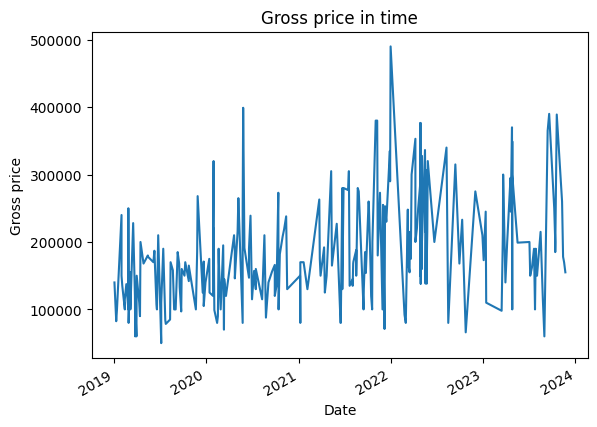

In [91]:
dwellings_EDA.set_index('Date')['Gross_Price'].plot(title='Gross price in time')
plt.xlabel('Date')
plt.ylabel('Gross price')
plt.show()

#### 2.5.12 Timetables

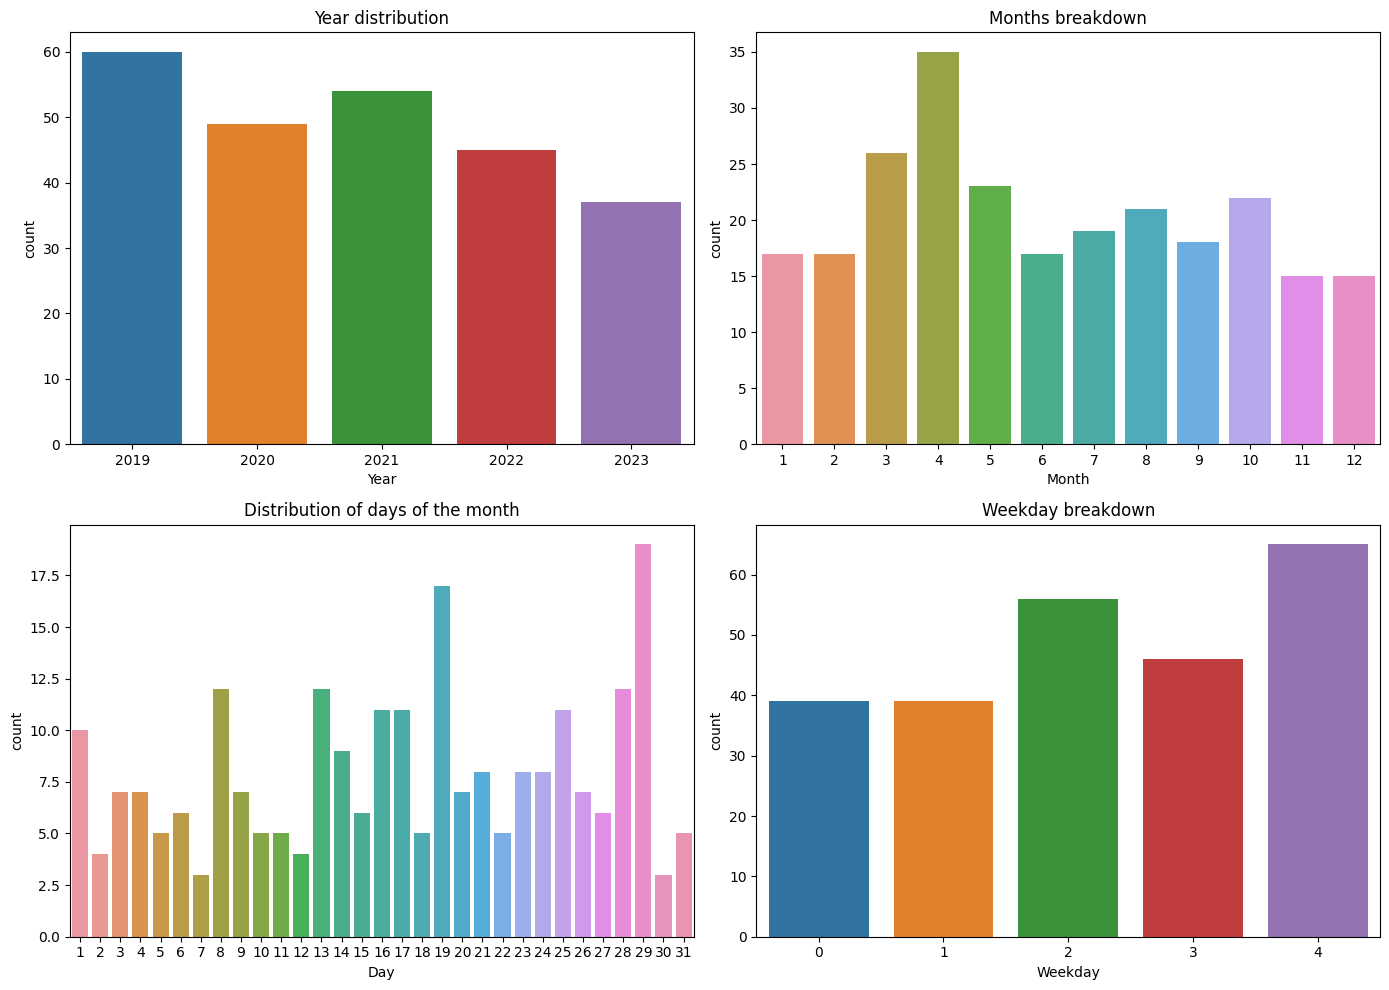

In [92]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
sns.countplot(x='Year', data=dwellings_EDA, ax=axes[0, 0])
sns.countplot(x='Month', data=dwellings_EDA, ax=axes[0, 1])
sns.countplot(x='Day', data=dwellings_EDA, ax=axes[1, 0])
sns.countplot(x='Weekday', data=dwellings_EDA, ax=axes[1, 1])

axes[0, 0].set_title('Year distribution')
axes[0, 1].set_title('Months breakdown')
axes[1, 0].set_title('Distribution of days of the month')
axes[1, 1].set_title('Weekday breakdown')
plt.tight_layout()
plt.show()

### 2.6.0 Data processing and preparation

In [93]:
dwellings.head()

,Date,Market,Gross_Price,Number_of_Rooms,Floor,Usable_Area,Usable_area_of_a_p
0,2019-01-14,pierwotny,100000.0,3,2,48.45,0.00
1,2019-01-11,pierwotny,82500.0,2,4,38.22,0.00
2,2019-01-04,wtórny,140000.0,2,3,51.35,0.00
3,2019-02-01,wtórny,240000.0,3,2,61.00,2.97
4,2019-02-14,pierwotny,100000.0,3,1,37.60,2.50


In [94]:
dwellings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                245 non-null    datetime64[ns]
 1   Market              245 non-null    category      
 2   Gross_Price         245 non-null    float64       
 3   Number_of_Rooms     245 non-null    category      
 4   Floor               245 non-null    category      
 5   Usable_Area         245 non-null    float64       
 6   Usable_area_of_a_p  245 non-null    float64       
dtypes: category(3), datetime64[ns](1), float64(3)
memory usage: 9.0 KB


In [95]:
dwellings['Day'] = dwellings['Date'].dt.day
dwellings['Month'] = dwellings['Date'].dt.month
dwellings['Year'] = dwellings['Date'].dt.year

dwellings['Day'] = dwellings['Day'].astype('category')
dwellings['Month'] = dwellings['Month'].astype('category')
dwellings['Year'] = dwellings['Year'].astype('category')

dwellings = dwellings.drop('Date', axis=1)

In [96]:
dwellings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Market              245 non-null    category
 1   Gross_Price         245 non-null    float64 
 2   Number_of_Rooms     245 non-null    category
 3   Floor               245 non-null    category
 4   Usable_Area         245 non-null    float64 
 5   Usable_area_of_a_p  245 non-null    float64 
 6   Day                 245 non-null    category
 7   Month               245 non-null    category
 8   Year                245 non-null    category
dtypes: category(6), float64(3)
memory usage: 9.7 KB


#### 2.6.1 Data split

In [97]:
dwellings_cross = dwellings.copy()
train_set, test_set = train_test_split(dwellings, test_size=0.2, random_state=42)

train_set_label = train_set['Gross_Price'].copy()
train_set = train_set.drop('Gross_Price',  axis=1)

test_set_label = test_set['Gross_Price'].copy()
test_set = test_set.drop('Gross_Price', axis=1)


#### 2.6.2 Transformations

In [100]:
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

# num_attribs = ['Usable_Area', 'Usable_area_of_a_p']
# cat_attribs= ['Market', 'Number_of_Rooms', 'Floor', 'Day', 'Month', 'Year']

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

train_set_prepared = preprocessing.fit_transform(train_set)


In [102]:
preprocessing.get_feature_names_out()

array(['pipeline-1__Usable_Area', 'pipeline-1__Usable_area_of_a_p'],
      dtype=object)

## 3.0.0 Model selection and training

### 3.1.0 Linear Regression

In [103]:
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(train_set, train_set_label)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bcc16415000>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bcc16414fd0>)])),
                ('linearregression', LinearRegression())])

In [106]:
dwellings_predictions = lin_reg.predict(train_set)
dwellings_predictions[:5].round(-2)

array([138500., 137100., 168600., 148300., 319100.])

In [107]:
train_set_label[:5].values

array([190000., 245000.,  87866., 155000., 399000.])

In [108]:
lin_rmse = mean_squared_error(train_set_label, dwellings_predictions, squared=False)
lin_rmse

59806.431761329506

### 3.2.0 Decision Tree Regressor

In [109]:
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(train_set, train_set_label)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bcc16415000>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bcc16414fd0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [110]:
dwellings_predictions = tree_reg.predict(train_set)
dwellings_predictions[:5].round(-2)

array([190000., 245000.,  87900., 155000., 399000.])

In [111]:
train_set_label[:5].values

array([190000., 245000.,  87866., 155000., 399000.])

In [112]:
lin_rmse = mean_squared_error(train_set_label, dwellings_predictions, squared=False)
lin_rmse

16959.1954089328

### 3.3.0 Random Forest Regressor

In [114]:
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_reg.fit(train_set, train_set_label)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bcc16415000>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bcc16414fd0>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [115]:
dwellings_predictions = forest_reg.predict(train_set)
dwellings_predictions[:5].round(-2)

array([174000., 188600., 108200., 142300., 324800.])

In [116]:
train_set_label[:5].values

array([190000., 245000.,  87866., 155000., 399000.])

In [117]:
lin_rmse = mean_squared_error(train_set_label, dwellings_predictions, squared=False)
lin_rmse

29024.948792014446

### 3.4.0 More accurate assessment using crosvalidation

#### 3.4.1 Linear Regression

In [119]:
lin_rmses = -cross_val_score(lin_reg, train_set, train_set_label, scoring='neg_root_mean_squared_error', cv=10)
lin_rmses

array([74544.08166451, 57845.04259677, 57897.01713839, 53458.2583873 ,
       63518.41987605, 74209.93457933, 53724.71942816, 66868.53215363,
       46338.01435364, 54324.43003625])

In [121]:
pd.Series(lin_rmses).describe()

count       10.000000
mean     60272.845021
std       9323.601919
min      46338.014354
25%      53874.647080
50%      57871.029868
75%      66031.004084
max      74544.081665
dtype: float64

#### 3.4.2 Decision Tree Regressor

In [122]:
tree_rmses = -cross_val_score(tree_reg, train_set, train_set_label, scoring='neg_root_mean_squared_error', cv=10)
tree_rmses

array([103405.65602422,  59357.392126  ,  81617.42426454,  71275.76730278,
        95947.64916349,  85141.1185588 ,  72232.92458939,  78372.88614585,
        82763.43591002,  66634.13484331])

In [123]:
pd.Series(tree_rmses).describe()

count        10.000000
mean      79674.838893
std       13256.568590
min       59357.392126
25%       71515.056624
50%       79995.155205
75%       84546.697897
max      103405.656024
dtype: float64

#### 3.4.2 Random Forest Regressor

In [124]:
forest_rmses = -cross_val_score(forest_reg, train_set, train_set_label, scoring='neg_root_mean_squared_error', cv=10)
forest_rmses

array([88781.64554345, 52520.74213627, 65537.75650433, 56382.07041743,
       75783.52812555, 78100.3063578 , 71904.7181794 , 68556.77402696,
       63675.50346082, 55434.9403816 ])

In [125]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     67667.798513
std      11383.017963
min      52520.742136
25%      58205.428678
50%      67047.265266
75%      74813.825639
max      88781.645543
dtype: float64

### 3.5.0 Regularization the selected model

#### 3.5.1 Grid Search

In [151]:
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ('random_forest', RandomForestRegressor(random_state=42))
])

param_grid = [
    {'random_forest__n_estimators': [10, 30, 50, 100],
     'random_forest__max_features': [2, 4, 6, 8],
     'random_forest__max_depth': [None, 10, 20, 30]},
    {'random_forest__bootstrap': [False],
     'random_forest__n_estimators': [10, 30, 50, 100],
     'random_forest__max_features': [2, 4, 6, 8],
     'random_forest__max_depth': [None, 10, 20, 30],
     'random_forest__min_samples_split': [2, 5, 10],
     'random_forest__min_samples_leaf': [1, 2, 4]}
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(train_set, train_set_label)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7bcc16415000>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._...
                          'random_forest__n_estimators': [10, 30, 50, 100]},
                         {'random_forest__bootstrap': [False],
                          'random_forest__max_depth': [None, 10, 20, 30],
                          'random_forest__max_features': [2, 4, 6, 8],
                          'random_forest__min_samples_leaf': [1, 2, 4],
                          'random_forest__min_samples_split': [2, 5, 10],
                          'random_forest__n_estimators': [10, 30, 50, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [152]:
grid_search.best_params_

{'random_forest__bootstrap': False,
 'random_forest__max_depth': None,
 'random_forest__max_features': 2,
 'random_forest__min_samples_leaf': 4,
 'random_forest__min_samples_split': 10,
 'random_forest__n_estimators': 10}

In [154]:
optimized_forest  = make_pipeline(preprocessing, RandomForestRegressor(
    bootstrap=False,
    max_depth=None,
    max_features=2,
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=10,
    random_state=42
))

forest_rmses = -cross_val_score(optimized_forest , train_set, train_set_label, scoring='neg_root_mean_squared_error', cv=10)
forest_rmses

array([95473.67126852, 57653.21895765, 60267.79631965, 58374.10052421,
       67035.31977926, 70646.29011696, 70386.18917898, 73132.63122339,
       66037.83686705, 53650.9632871 ])

In [155]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     67265.801752
std      11825.721189
min      53650.963287
25%      58847.524473
50%      66536.578323
75%      70581.264882
max      95473.671269
dtype: float64

#### 3.5.2 Randomized Search

In [156]:
param_dist = {
    'random_forest__n_estimators': [10, 30, 50, 100, 200],
    'random_forest__max_features': ['auto', 'sqrt', 2, 4, 6, 8],
    'random_forest__max_depth': [None, 10, 20, 30, 40, 50],
    'random_forest__min_samples_split': [2, 5, 10],
    'random_forest__min_samples_leaf': [1, 2, 4],
    'random_forest__bootstrap': [True, False]
}


random_search = RandomizedSearchCV(full_pipeline, param_distributions=param_dist,
                                   n_iter=100, cv=5, scoring='neg_mean_squared_error',
                                   random_state=42, return_train_score=True)


random_search.fit(train_set, train_set_label)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7bcc16415000>),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('onehotencoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               <sklearn.com...
                   param_distributions={'random_forest__bootstrap': [True,
                                                                     False],
                                        'random_forest__max_depth': [None, 10,
                                                                     20, 30, 40,
                                                                     50],
                                        'random_forest__max_features': ['auto',
                                                                        'sqrt',
                                                                        2, 4, 6,
                                                                        8],
                                        'random_forest__min_samples_leaf': [1,
                                                                            2,
                                                                            4],
                                        'random_forest__min_samples_split': [2,
                                                                             5,
                                                                             10],
                                        'random_forest__n_estimators': [10, 30,
                                                                        50, 100,
                                                                        200]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [159]:
print(random_search.best_params_)
print(random_search.best_estimator_)


{'random_forest__n_estimators': 50, 'random_forest__min_samples_split': 2, 'random_forest__min_samples_leaf': 4, 'random_forest__max_features': 'sqrt', 'random_forest__max_depth': 30, 'random_forest__bootstrap': True}
Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bcc1ff6bca0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at

In [160]:
optimized_forest = Pipeline([
    ("preprocessing", preprocessing),
    ('linear_regression', RandomForestRegressor(
    n_estimators=50,
    min_samples_split=2,
    min_samples_leaf=4,
    max_features='sqrt',
    max_depth=30,
    bootstrap=True,
    random_state=42
))
])


forest_rmses = -cross_val_score(optimized_forest , train_set, train_set_label, scoring='neg_root_mean_squared_error', cv=10)
forest_rmses

array([86383.51224617, 50575.76995455, 51994.88707259, 52475.22447347,
       64358.97773111, 68829.75008355, 64428.36053593, 69670.0694872 ,
       56464.55282002, 47158.61335052])

In [161]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     61233.971776
std      11915.766581
min      47158.613351
25%      52114.971423
50%      60411.765276
75%      67729.402697
max      86383.512246
dtype: float64

### 3.6.0 Training without data splitting

In [157]:
dwellings_cross_label = dwellings_cross['Gross_Price'].copy()
dwellings_cross = dwellings_cross.drop('Gross_Price',  axis=1)


In [171]:
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ('linear_regression', RandomForestRegressor())
])
scores = -cross_val_score(full_pipeline, dwellings_cross, dwellings_cross_label, cv=10, scoring='neg_root_mean_squared_error')
scores

array([77097.08058856, 82040.9475596 , 64574.95612522, 60584.86577227,
       51168.6610903 , 72170.41551179, 93706.53293994, 60209.02136265,
       83909.44064983, 74552.44351672])

In [172]:
pd.Series(scores).describe()

count       10.000000
mean     72001.436512
std      12930.419001
min      51168.661090
25%      61582.388361
50%      73361.429514
75%      80804.980817
max      93706.532940
dtype: float64

In [173]:
param_dist = {
    'linear_regression__n_estimators': [10, 30, 50, 100, 200],
    'linear_regression__max_features': ['auto', 'sqrt', 2, 4, 6, 8],
    'linear_regression__max_depth': [None, 10, 20, 30, 40, 50],
    'linear_regression__min_samples_split': [2, 5, 10],
    'linear_regression__min_samples_leaf': [1, 2, 4],
    'linear_regression__bootstrap': [True, False]
}

random_search = RandomizedSearchCV(full_pipeline, param_distributions=param_dist,
                                   n_iter=100, cv=5, scoring='neg_mean_squared_error',
                                   random_state=42, return_train_score=True)

random_search.fit(dwellings_cross, dwellings_cross_label)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7bcc16415000>),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('onehotencoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               <sklearn.com...
                   param_distributions={'linear_regression__bootstrap': [True,
                                                                         False],
                                        'linear_regression__max_depth': [None,
                                                                         10, 20,
                                                                         30, 40,
                                                                         50],
                                        'linear_regression__max_features': ['auto',
                                                                            'sqrt',
                                                                            2,
                                                                            4,
                                                                            6,
                                                                            8],
                                        'linear_regression__min_samples_leaf': [1,
                                                                                2,
                                                                                4],
                                        'linear_regression__min_samples_split': [2,
                                                                                 5,
                                                                                 10],
                                        'linear_regression__n_estimators': [10,
                                                                            30,
                                                                            50,
                                                                            100,
                                                                            200]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [174]:
print(random_search.best_params_)
print(random_search.best_estimator_)

{'linear_regression__n_estimators': 50, 'linear_regression__min_samples_split': 2, 'linear_regression__min_samples_leaf': 4, 'linear_regression__max_features': 'sqrt', 'linear_regression__max_depth': 30, 'linear_regression__bootstrap': True}
Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bcc1d447850>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_c

In [178]:
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ('linear_regression', RandomForestRegressor(
        n_estimators=50,
        min_samples_split=2,
        min_samples_leaf=4,
        max_features='sqrt',
        max_depth=30,
        bootstrap=True
    ))
])

scores = -cross_val_score(full_pipeline, dwellings_cross, dwellings_cross_label, cv=10, scoring='neg_root_mean_squared_error')
scores


array([70249.75151643, 72368.7324911 , 52606.34293229, 52509.28746758,
       39904.04300226, 56818.52632713, 95138.85301875, 62515.25498567,
       83093.71030166, 67504.38387705])

In [179]:
pd.Series(scores).describe()

count       10.000000
mean     65270.888592
std      16109.580371
min      39904.043002
25%      53659.388781
50%      65009.819431
75%      71838.987247
max      95138.853019
dtype: float64

## 4.0.0 Evaluating the chosen model

In [185]:
final_model = Pipeline([
    ("preprocessing", preprocessing),
    ('linear_regression', RandomForestRegressor(
    n_estimators=50,
    min_samples_split=2,
    min_samples_leaf=4,
    max_features='sqrt',
    max_depth=30,
    bootstrap=True,
    random_state=42
))
])

final_model.fit(train_set, train_set_label)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bcc16415000>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bcc16414fd0>)])),
                ('linear_regression',
                 RandomForestRegressor(max_depth=30, max_features='sqrt',
                                       min_samples_leaf=4, n_estimators=50,
                                       random_state=42))])

In [192]:
final_model_predictions = final_model.predict(test_set)
final_model_predictions[:30].round(-2)


array([168300., 150400., 158600., 200700., 153900., 239800., 132400.,
       126000., 294000., 155100., 187200., 121800., 165100., 267900.,
       243500., 209500., 183200., 178300., 207200., 176900., 209500.,
       178300., 191000., 242800., 208100., 290700., 267900., 205400.,
       267900., 156800.])

In [193]:
test_set_label[:30].values

array([168000., 115000., 273000., 300000., 200000., 327000., 138240.,
        80000., 150000., 135000.,  97000.,  98000., 140000., 376510.,
       216000., 157000., 178000.,  60000., 120000., 185000.,  50000.,
       100000., 150000., 210000.,  80000., 305000., 250000., 190000.,
       490000., 100000.])

In [191]:
final_rmse = mean_squared_error(test_set_label, final_model_predictions, squared=False)
final_rmse

77382.67898673954